In [1]:
!pip install osmnx geopandas matplotlib pyproj tensorflow opencv-python numpy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.3/101.3 kB 2.3 MB/s eta 0:00:00


In [2]:
import osmnx as ox

# Define your city
city = "Colombo, Sri Lanka"

# Download road network for driving
G = ox.graph_from_place(city, network_type='drive')

# Convert to GeoDataFrame
gdf_edges = ox.graph_to_gdfs(G, nodes=False)

# Save as shapefile (or GeoPackage)
gdf_edges.to_file("colombo_roads.geojson", driver="GeoJSON")


In [3]:
from google.colab import files
uploaded = files.upload()  # Upload crhd_generator_v2.py


Saving crhd_generator_v2.py to crhd_generator_v2.py


In [4]:
import osmnx as ox
import geopandas as gpd

# Get Colombo city boundary by name
place = "Colombo, Sri Lanka"
gdf = ox.geocode_to_gdf(place)

# Check
print(gdf.crs)  # Usually EPSG:4326
print(gdf)

# Save to shapefile if you want
gdf.to_file("colombo_boundary.shp")


epsg:4326
                                            geometry  bbox_west  bbox_south  \
0  MULTIPOLYGON (((79.82046 6.94049, 79.82049 6.9...  79.820458    6.862414   

   bbox_east  bbox_north   place_id  osm_type  osm_id       lat        lon  \
0  79.890003     6.98136  237555176  relation   16132  6.938861  79.854201   

      class            type  place_rank  importance addresstype     name  \
0  boundary  administrative          16    0.642657        city  Colombo   

                                        display_name  
0  Colombo, Colombo District, Western Province, S...  


/tmp/ipython-input-4-2044498836.py:13: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file("colombo_boundary.shp")
/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'addresstype' to 'addresstyp'
  ogr_write(
/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'display_name' to 'display_na'
  ogr_write(


In [5]:
pip install geopandas shapely fiona pyproj

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 61.9 MB/s eta 0:00:00


In [6]:
from shapely.geometry import box
import numpy as np

# Load Colombo boundary polygon (if you saved it)
# gdf = gpd.read_file("colombo_boundary.shp")

boundary = gdf.geometry.iloc[0]  # Single polygon

# Define grid size in degrees (approximate)
# 1 km ~ 0.009 degrees latitude, but varies by longitude
grid_size_deg = 0.01  # roughly 1km grid size

minx, miny, maxx, maxy = boundary.bounds

# Create grid cells
x_coords = np.arange(minx, maxx, grid_size_deg)
y_coords = np.arange(miny, maxy, grid_size_deg)

grid_cells = []
for x in x_coords:
    for y in y_coords:
        cell = box(x, y, x + grid_size_deg, y + grid_size_deg)
        if cell.intersects(boundary):
            grid_cells.append(cell.intersection(boundary))

# Create GeoDataFrame
grid = gpd.GeoDataFrame({'geometry': grid_cells})
grid.crs = "EPSG:4326"

# Save grid shapefile
grid.to_file("colombo_grid.shp")

In [7]:
# Import necessary modules
import geopandas as gpd
from crhd_generator_v2 import CityListPloter, mkdir

# Define mkdir to safely create directories (including parents)
import os
def mkdir(path):
    os.makedirs(path, exist_ok=True)

# Create an instance of the plotting class
plotter = CityListPloter()

# Define file paths
grid_path = '/content/colombo_grid.shp'   # Your Colombo grid shapefile path
save_path = '/content/save/crhd_images'   # Folder to save CRHD images

# Create output folder (including parents) if it doesn't exist
mkdir(save_path)

# Call the PlotCity function to generate CRHD images for Colombo
plotter.PlotCity(grid_path=grid_path, save_path=save_path, city_name='Colombo', dist=1000, if_local=False)

print("CRHD generation for Colombo completed!")


/content/crhd_generator_v2.py:285: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  grids['coord'] = [(centroid.y, centroid.x) for centroid in grids.geometry.centroid]


Round1: drawing Colombo_0
Round1: drawing Colombo_1
Round1: drawing Colombo_2
Round1: drawing Colombo_3
---------- Round1: Colombo_3 image generation failed ----------
Round1: drawing Colombo_4
Round1: drawing Colombo_5
Round1: drawing Colombo_6
Round1: drawing Colombo_7
Round1: drawing Colombo_8
Round1: drawing Colombo_9
Round1: drawing Colombo_10
Round1: drawing Colombo_11
Round1: drawing Colombo_12
Round1: drawing Colombo_13
Round1: drawing Colombo_14
Round1: drawing Colombo_15
Round1: drawing Colombo_16
Round1: drawing Colombo_17
Round1: drawing Colombo_18
Round1: drawing Colombo_19
Round1: drawing Colombo_20
Round1: drawing Colombo_21
Round1: drawing Colombo_22
Round1: drawing Colombo_23
Round1: drawing Colombo_24
Round1: drawing Colombo_25
Round1: drawing Colombo_26
Round1: drawing Colombo_27
Round1: drawing Colombo_28
Round1: drawing Colombo_29
Round1: drawing Colombo_30
Round1: drawing Colombo_31
Round1: drawing Colombo_32
Round1: drawing Colombo_33
Round1: drawing Colombo_34
R

In [8]:
# upload manually using
from google.colab import files
uploaded = files.upload()  # Upload your 4 scripts + model weights zip here

Saving morphoindex_generator_v2.py to morphoindex_generator_v2.py
Saving ResNet-34-6class-aug5.h5 to ResNet-34-6class-aug5.h5
Saving config.py to config.py
Saving Build_model.py to Build_model.py
Saving MODEL.py to MODEL.py


In [10]:
# Run the classification
!python morphoindex_generator_v2.py \
    --input_folder /content/save/crhd_images \
    --output_file /content/colombo_road_patterns.csv \
    --model_path /content/ResNet-34-6class-aug5.h5


2025-07-22 14:29:33.179158: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753194573.217332    8877 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753194573.229093    8877 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-07-22 14:29:36.504807: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [15]:
import geopandas as gpd

# Load your grid file
grids = gpd.read_file('/content/colombo_grid.shp')

# Add the missing 'city_ascii' column
grids['city_ascii'] = 'Colombo'  # or any name you want

# Save it back (overwrite or save as new file)
grids.to_file('/content/colombo_grid.shp', driver='ESRI Shapefile')


In [16]:
classifier = prob_calculator(channeles=3)
classifier.load_model('/content/ResNet-34-6class-aug5.h5')

grids = classifier.get_grids_prob(
    grids='/content/colombo_grid.shp',
    image_path='/content/save/crhd_images',
    save_path=None
)

grids.drop(columns='geometry').to_csv('/content/colombo_road_patterns.csv', index=False)


# Done — you can now read it back or download
import pandas as pd
results = pd.read_csv('/content/colombo_road_patterns.csv')
print(results.head())




 Start predicting road network pattern of grids...
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Current grid: Colombo_0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
trying to plot grid Colombo_3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1

In [17]:
results_clean = results.dropna(subset=['cls'])


In [19]:
print(results['cls'].value_counts())


cls
Organic       27
Tributary     13
Nopattern      8
Radial         7
Linear         4
Gridiron       3
No pattern     1
Name: count, dtype: int64


In [22]:
!pip install contextily


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 52.1 MB/s eta 0:00:00


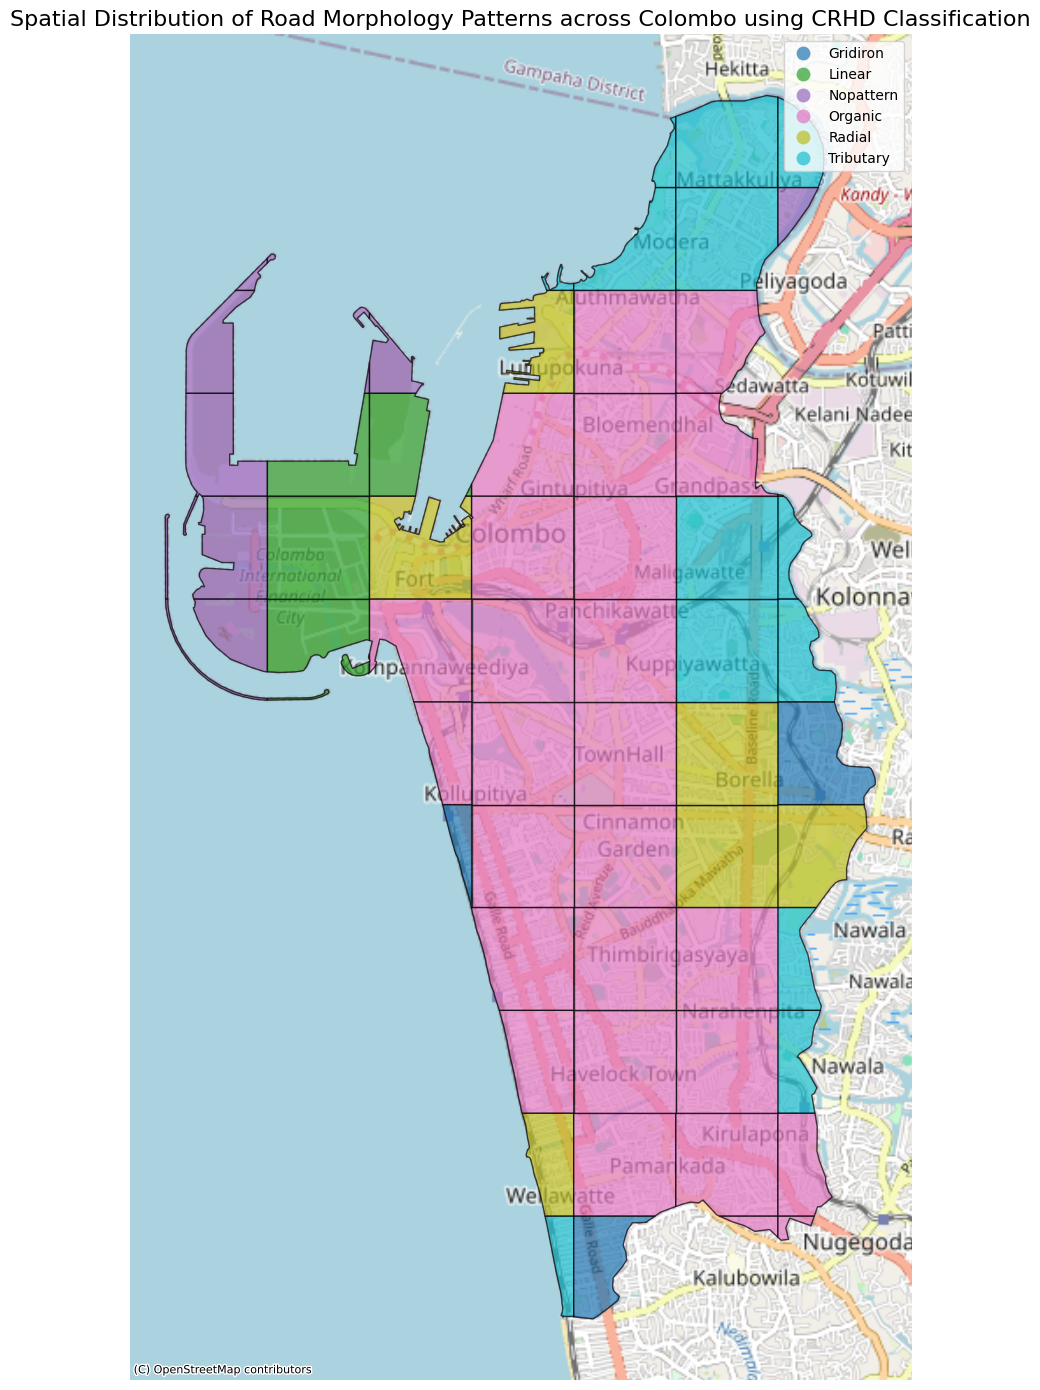

In [27]:
import geopandas as gpd
import pandas as pd
import contextily as ctx
import matplotlib.pyplot as plt

# Load grid and results
grid = gpd.read_file("/content/colombo_grid.shp")
results = pd.read_csv("/content/colombo_road_patterns.csv")

# Fix inconsistent labels
results['cls'] = results['cls'].replace({'No pattern': 'Nopattern'})

# Merge results with grid
merged = grid.merge(results, left_index=True, right_on="FID")

# Convert to Web Mercator (EPSG:3857) for basemap
merged_web = merged.to_crs(epsg=3857)

# Plot with basemap
fig, ax = plt.subplots(figsize=(14, 14))
merged_web.plot(column='cls', ax=ax, legend=True, cmap='tab10', alpha=0.7, edgecolor='black')

# Add basemap (e.g., OpenStreetMap)
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# Add title
ax.set_title("Spatial Distribution of Road Morphology Patterns across Colombo using CRHD Classification", fontsize=16)


# Remove axis
ax.set_axis_off()
plt.tight_layout()
plt.show()
